In [6]:
import os
import dotenv
import sqlalchemy
import pandas as pd

covid = pd.read_csv("owid-covid-data.csv")
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


### 1. Si richiede di verificare le dimensioni del dataset e i relativi metadati

in base alla richiesta faccio una prima esplorazione del dataset. Verifico il numero di righe e colonne 

In [9]:
covid.shape # Verifico il numero di righe e colonne 

(429435, 67)

In [11]:
covid.head(10) # visualizzo le prime righe e le ultime del dataset per avere un'idea migliore del dataset dei dati che andrò ad analizzare

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-01-11,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-01-12,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-01-13,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-01-14,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [11]:
covid.tail(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
429425,ZWE,Africa,Zimbabwe,2024-07-26,266386.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429426,ZWE,Africa,Zimbabwe,2024-07-27,266386.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429427,ZWE,Africa,Zimbabwe,2024-07-28,266386.0,0.0,0.000,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429428,ZWE,Africa,Zimbabwe,2024-07-29,266386.0,0.0,0.000,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429429,ZWE,Africa,Zimbabwe,2024-07-30,266386.0,0.0,0.000,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.000,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.000,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.000,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.000,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429434,ZWE,Africa,Zimbabwe,2024-08-04,266386.0,0.0,0.000,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [12]:
covid.sample(15) # ho pensato di fare anche un sample perchè il dataset è molto grande e le prime e le ultime righe non mi restituiscono location differenti

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
357279,ZAF,Africa,South Africa,2023-10-25,4072576.0,0.0,2.143,102595.0,0.0,0.000,...,33.2,43.993,2.32,64.13,0.709,59893884,NaN,NaN,NaN,NaN
60931,KHM,Asia,Cambodia,2021-10-19,116665.0,0.0,265.000,2658.0,0.0,21.714,...,33.7,66.229,0.80,69.82,0.594,16767851,NaN,NaN,NaN,NaN
30110,BHR,Asia,Bahrain,2024-06-30,696614.0,0.0,0.000,1536.0,0.0,0.000,...,37.6,NaN,2.00,77.29,0.852,1472237,NaN,NaN,NaN,NaN
58,AFG,Asia,Afghanistan,2020-03-03,1.0,0.0,0.143,0.0,0.0,0.000,...,NaN,37.746,0.50,64.83,0.511,41128772,NaN,NaN,NaN,NaN
139451,GEO,Asia,Georgia,2021-12-19,909160.0,19874.0,2839.143,13071.0,340.0,48.571,...,55.5,NaN,2.60,73.77,0.812,3744385,NaN,NaN,NaN,NaN
287105,NOR,Europe,Norway,2023-03-11,1479802.0,0.0,49.714,5248.0,0.0,1.429,...,20.7,NaN,3.60,82.40,0.957,5434324,NaN,NaN,NaN,NaN
160913,GUY,South America,Guyana,2021-02-22,8357.0,0.0,25.143,189.0,0.0,0.429,...,NaN,77.159,1.60,69.91,0.682,808727,NaN,NaN,NaN,NaN
414518,VUT,Oceania,Vanuatu,2023-09-24,12019.0,0.0,0.000,14.0,0.0,0.000,...,34.5,25.209,NaN,70.47,0.609,326744,NaN,NaN,NaN,NaN
305465,PCN,Oceania,Pitcairn,2023-01-09,4.0,0.0,0.000,0.0,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,47,NaN,NaN,NaN,NaN
338202,OWID_SCT,Europe,Scotland,2021-02-27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5466000,NaN,NaN,NaN,NaN


In [13]:
covid.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,411804.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060873,112096.199396,122.357074,122.713844,835.514313,...,33.097723,50.649264,3.106912,73.702098,0.722139,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666400
std,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636567,162240.412419,1508.778583,559.701638,1134.932671,...,13.853948,31.905375,2.549205,7.387914,0.148903,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892769
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100500,0.000000,0.000000,24.568000,...,22.600000,20.859000,1.300000,69.500000,0.602000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.872242
50%,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.475000,0.000000,2.794000,295.089000,...,33.100000,49.542000,2.500000,75.050000,0.740000,6.336393e+06,6.815199e+03,8.130000,5.660000,1270.801400
75%,7.582720e+05,0.000000e+00,3.132860e+02,9.574000e+03,0.000000,3.143000,156770.190000,0.000000,56.253000,1283.817000,...,41.500000,82.502000,4.210000,79.460000,0.829000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.024150
max,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.515000


In [14]:
# per i metadati:
covid.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

Dall'esplorazione dei metadati posso notare che le 67 colonne contengono principalmente dati quantitativi. 
I dati qualitativi sono relativi al continente e alla nazione presi in considerazione e alle date.

In [16]:
covid.isna().sum() # ho fatto anche una verifica dei dati nulli

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [52]:
for column in covid. columns:
    if covid[column].dtype == "object":
        print(f"{column} column contains categorical data.")
        unique_count = covid[column].nunique()
        print(f"{column} contains {unique_count} unique values")
        all_count = covid[column].value_counts()
        print(f"Distribution of every unique value is as such:")
        print(all_count)
        print()


iso_code column contains categorical data.
iso_code contains 243 unique values
Distribution of every unique value is as such:
iso_code
TLS         2688
FRO         2068
LTU         1684
MYS         1684
EST         1682
            ... 
OWID_SCT    1305
OWID_WLS    1198
MAC          795
OWID_CYN     691
ESH            1
Name: count, Length: 243, dtype: int64

continent column contains categorical data.
continent contains 6 unique values
Distribution of every unique value is as such:
continent
Africa           95419
Europe           91031
Asia             84199
North America    68638
Oceania          40183
South America    23440
Name: count, dtype: int64

location column contains categorical data.
location contains 243 unique values
Distribution of every unique value is as such:
location
East Timor         2688
Faroe Islands      2068
Lithuania          1684
Malaysia           1684
Estonia            1682
                   ... 
Scotland           1305
Wales              1198
Macao     

# Calcolo del numero totale di casi per continente
covid['continent'] = covid['continent'].fillna('Unknown')
total_cases_per_continent = covid.groupby('continent').total_cases.max() #.dropna()
total_cases_per_continent


totali_per_location = covid.groupby("location")["casi_cumulativi_location"].max()
totali_per_location





covid['casi_cumulativi_location'] = covid.groupby("location")["new_cases"].cumsum()

totali_per_location = covid.groupby("location")["casi_cumulativi_location"].max()
totali_per_location
totali_per_continente = totali_per_location.groupby("continent")["totali_per_location"].sum()
totali_per_continente

# Associa i totali con i rispettivi continenti
location_to_continent = covid[['location', 'continent']].drop_duplicates().set_index('location')
totali_per_location = totali_per_location.to_frame(name='totale_cumulativo')
totali_per_location['continent'] = location_to_continent['continent']

# Somma i totali per continente
totali_per_continente = totali_per_location.groupby("continent")["totale_cumulativo"].sum()

# Mostra i risultati
print(totali_per_continente)


In [23]:
# Calcolo la somma cumulativa per ogni location
covid['casi_cumulativi_location'] = covid.groupby("location")["new_cases"].cumsum()

# Ottieni l'ultimo valore della somma cumulativa per ogni location
totali_per_location = covid.groupby("location")["casi_cumulativi_location"].max()

# Step 3: Associa ogni location al suo continente
location_to_continent = covid[['location', 'continent']].drop_duplicates().set_index('location')
totali_per_location = totali_per_location.to_frame(name='totale_cumulativo')
totali_per_location['continent'] = location_to_continent['continent']

# Step 4: Somma i totali cumulativi per continente
totali_per_continente = totali_per_location.groupby("continent")["totale_cumulativo"].sum()

# Mostra i risultati
print(totali_per_continente)



continent
Africa            13146831.0
Asia             301564180.0
Europe           252916868.0
North America    124492698.0
Oceania           15003468.0
South America     68811012.0
Name: totale_cumulativo, dtype: float64


In [24]:
max_total_cases = covid[covid['location'] == "Italy"]['total_cases'].max()
max_total_cases

26781078.0

In [25]:
somma_new_cases = covid[covid['location'] == "Italy"]['new_cases'].sum()
somma_new_cases

26781078.0

In [26]:
# Rimuovi le righe con valori nulli nella colonna 'continent'
covid = covid[covid['continent'].notna()]

# Calcola il massimo dei total_cases per ciascuna nazione
max_total_cases_per_nazione = covid.groupby("location")["total_cases"].max()

# Aggiungi la colonna 'continent' ai risultati
location_to_continent = covid[['location', 'continent']].drop_duplicates().set_index('location')
max_total_cases_per_nazione = max_total_cases_per_nazione.to_frame(name='max_total_cases')
max_total_cases_per_nazione['continent'] = location_to_continent['continent']

# Calcola il totale dei total_cases per continente
totali_per_continente = max_total_cases_per_nazione.groupby("continent")["max_total_cases"].sum()

# Mostra i risultati
print(totali_per_continente)


continent
Africa            13145540.0
Asia             301532347.0
Europe           252916868.0
North America    124492666.0
Oceania           15003352.0
South America     68809418.0
Name: max_total_cases, dtype: float64


In [27]:
# Step 1: Rimuovi le righe con valori nulli nella colonna 'continent'
covid = covid.dropna(subset=['continent'])

# Step 2: Calcola il massimo dei total_cases per ciascuna nazione
max_total_cases_per_nazione = covid.groupby("location")["total_cases"].max()

# Step 3: Associa la colonna 'continent' ai risultati per nazione
location_to_continent = covid[['location', 'continent']].drop_duplicates().set_index('location')
max_total_cases_per_nazione = max_total_cases_per_nazione.to_frame(name='max_total_cases')
max_total_cases_per_nazione['continent'] = location_to_continent['continent']

# Step 4: Somma i totali cumulativi per continente
totali_per_continente = max_total_cases_per_nazione.groupby("continent")["max_total_cases"].sum()

# Step 5: Mostra i risultati
print(totali_per_continente)


continent
Africa            13145540.0
Asia             301532347.0
Europe           252916868.0
North America    124492666.0
Oceania           15003352.0
South America     68809418.0
Name: max_total_cases, dtype: float64


In [69]:
# Calcola il totale complessivo dei casi cumulativi
totale_casi_mondiale = totali_per_continente.sum()

# Calcola le percentuali per continente
percentuali_per_continente = (totali_per_continente / totale_casi_mondiale * 100).round(2)

# Mostra le percentuali
percentuali_per_continente

continent
Africa            1.69
Asia             38.86
Europe           32.60
North America    16.04
Oceania           1.93
South America     8.87
Name: max_total_cases, dtype: float64

In [ ]:
#Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati: 
# a. l'evoluzione del casi totali dall'inizio alla fine dell'anno
# b. il numero di nuovi casi rispetto alla data
    # k. poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni

In [75]:
# Assicurati che la colonna 'date' sia in formato datetime
covid['date'] = pd.to_datetime(covid['date'])

# Filtra i dati per l'Italia e per l'anno 2022
italy_2022 = covid[(covid['location'] == "Italy") & (covid['date'].dt.year == 2022)]

# Visualizza i primi risultati per conferma
italy_2022


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,casi_cumulativi_location
186002,ITA,Europe,Italy,2022-01-01,5622431.0,0.0,36797.000,136530.0,0.0,140.857,...,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN,5622431.0
186003,ITA,Europe,Italy,2022-01-02,6267035.0,644604.0,92086.286,137513.0,983.0,140.429,...,NaN,3.18,83.51,0.892,59037472,168226.3,12.99,8.06,2849.4834,6267035.0
186004,ITA,Europe,Italy,2022-01-03,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN,6267035.0
186005,ITA,Europe,Italy,2022-01-04,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN,6267035.0
186006,ITA,Europe,Italy,2022-01-05,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN,6267035.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186362,ITA,Europe,Italy,2022-12-27,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN,25060503.0
186363,ITA,Europe,Italy,2022-12-28,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN,25060503.0
186364,ITA,Europe,Italy,2022-12-29,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN,25060503.0
186365,ITA,Europe,Italy,2022-12-30,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN,25060503.0


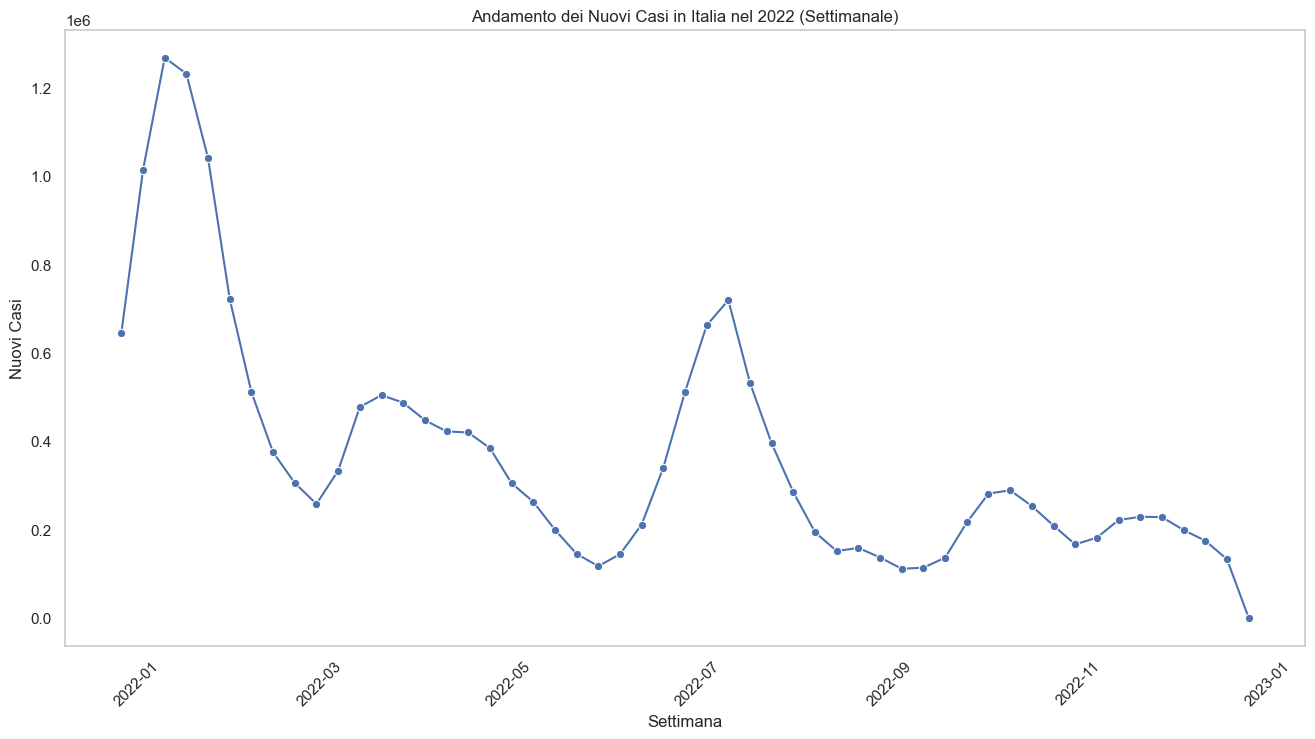

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assumendo che `italy_2022` sia già disponibile come dataframe
# Assicuriamoci che 'date' sia in formato datetime
italy_2022['date'] = pd.to_datetime(italy_2022['date'])

# Rimuoviamo eventuali valori nulli
italy_2022 = italy_2022.dropna(subset=['new_cases'])

# Raggruppamento dei dati per settimana
italy_2022['week'] = italy_2022['date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_data = italy_2022.groupby('week')['new_cases'].sum().reset_index()

# Creazione del grafico con Seaborn
plt.figure(figsize=(16, 8))
sns.lineplot(data=weekly_data, x='week', y='new_cases', marker='o')
plt.title("Andamento dei Nuovi Casi in Italia nel 2022 (Settimanale)")
plt.xlabel("Settimana")
plt.ylabel("Nuovi Casi")
plt.xticks(rotation=45)
plt.grid()
plt.show()

<Axes: xlabel='week', ylabel='new_cases'>

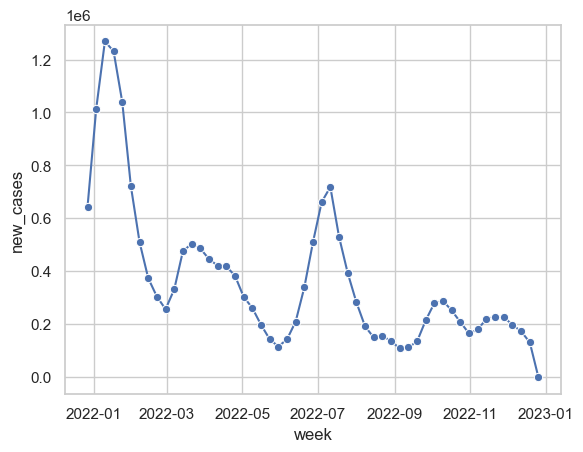

In [17]:
import pandas as pd
import seaborn as sns

# Assumendo che italy_2022 sia il DataFrame filtrato e contenga i dati
# Assicuriamoci che la colonna 'date' sia in formato datetime
italy_2022['date'] = pd.to_datetime(italy_2022['date'])

# Rimuoviamo eventuali valori nulli nella colonna 'new_cases'
italy_2022 = italy_2022.dropna(subset=['new_cases'])

# Raggruppamento settimanale
italy_2022['week'] = italy_2022['date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_data = italy_2022.groupby('week')['new_cases'].sum().reset_index()

# Creazione del grafico con Seaborn
sns.set(style="whitegrid")
sns.lineplot(data=weekly_data, x='week', y='new_cases', marker='o')

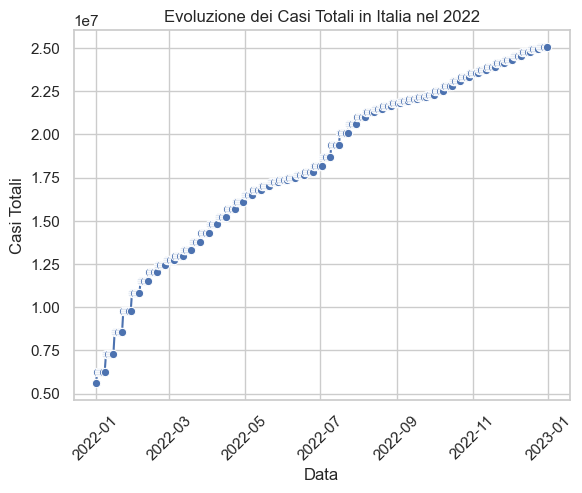

In [19]:
# Supponendo che il dataset `covid` sia disponibile e contenga i dati globali

import pandas as pd
import seaborn as sns

# Assicuriamoci che la colonna 'date' sia in formato datetime
covid['date'] = pd.to_datetime(covid['date'])

# Filtrare i dati per l'Italia nel 2022
italy_2022 = covid[(covid['location'] == "Italy") & (covid['date'].dt.year == 2022)]

# Rimuovere eventuali valori nulli
italy_2022 = italy_2022.dropna(subset=['total_cases'])

# Creare un grafico per mostrare l'evoluzione dei casi totali
sns.set(style="whitegrid")
sns.lineplot(data=italy_2022, x='date', y='total_cases', marker='o')

# Personalizzazioni del grafico
plt.title("Evoluzione dei Casi Totali in Italia nel 2022")
plt.xlabel("Data")
plt.ylabel("Casi Totali")
plt.xticks(rotation=45)
plt.show()

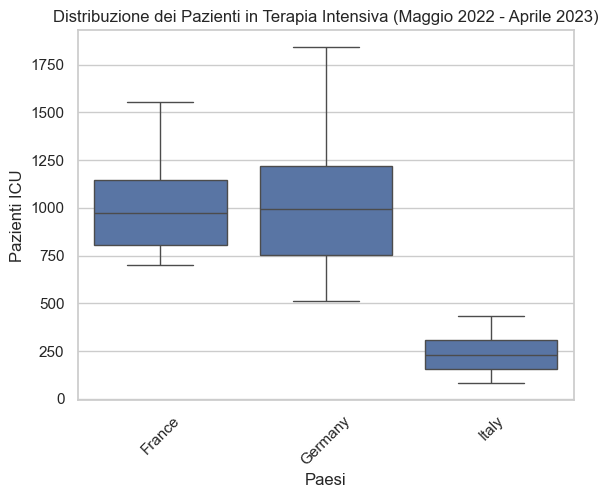

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Filtraggio per Italia, Germania e Francia dal maggio 2022 all'aprile 2023
locations = ['Italy', 'Germany', 'France']
period_covid = covid[
    (covid['location'].isin(locations)) & 
    (covid['date'] >= '2022-05-01') & 
    (covid['date'] <= '2023-04-30')
]

# Rimozione delle righe senza dati ICU
period_covid = period_covid.dropna(subset=['icu_patients'])

# Creazione del boxplot con Seaborn
sns.boxplot(data=period_covid, x="location", y="icu_patients")

# Personalizzazioni del grafico
plt.title("Distribuzione dei Pazienti in Terapia Intensiva (Maggio 2022 - Aprile 2023)")
plt.xlabel("Paesi")
plt.ylabel("Pazienti ICU")
plt.xticks(rotation=45)
plt.show()


C:\Users\luciana\AppData\Local\Temp\ipykernel_2132\1236664542.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([period_data[period_data['location'] == country]['icu_patients'] for country in countries], labels=countries)


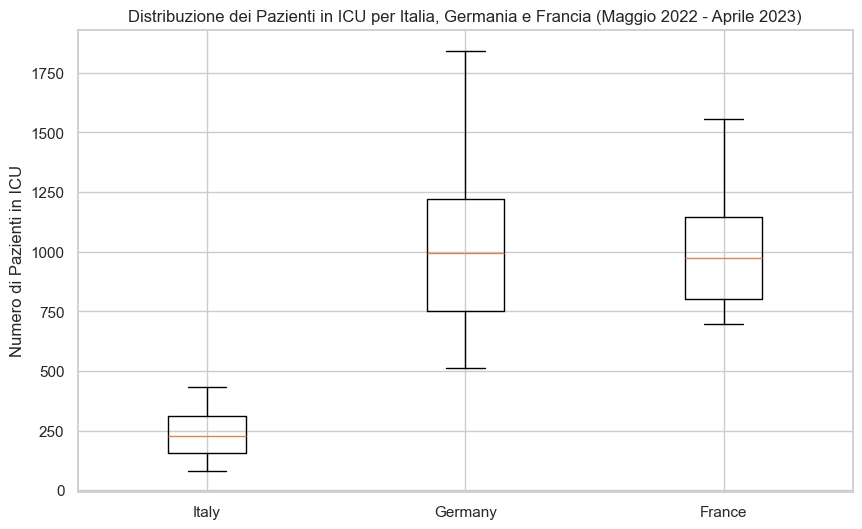

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtraggio per Italia, Germania e Francia dal maggio 2022 all'aprile 2023
countries = ['Italy', 'Germany', 'France']
period_data = covid[(covid['location'].isin(countries)) & (covid['date'] >= '2022-05-01') & (covid['date'] <= '2023-04-30')]

# Rimozione delle righe senza dati ICU
period_data = period_data.dropna(subset=['icu_patients'])

# Creazione del boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([period_data[period_data['location'] == country]['icu_patients'] for country in countries], labels=countries)
plt.title('Distribuzione dei Pazienti in ICU per Italia, Germania e Francia (Maggio 2022 - Aprile 2023)')
plt.ylabel('Numero di Pazienti in ICU')
plt.grid(True)
plt.show()

In [58]:

import pandas as pd

# Filtraggio per le nazioni e per l'anno 2023
selected_countries = ['Italy', 'Germany', 'France', 'Spain']
covid["date"] = pd.to_datetime(covid["date"])
hospital_data_2023 = covid[(covid['location'].isin(selected_countries)) & (covid['date'].dt.year == 2023)]

# Calcolo della somma dei pazienti ospitalizzati per ciascuna nazione
total_hospitalized = hospital_data_2023.groupby('location')['hosp_patients'].sum()

# Verifica dei dati nulli
missing_data = hospital_data_2023['hosp_patients'].isna().sum()

# Mostrare i risultati
print("Somma dei Pazienti Ospitalizzati per Nazione nel 2023:\n", total_hospitalized)
print("\nDati Mancanti per Pazienti Ospitalizzati nel 2023: ", missing_data)

Somma dei Pazienti Ospitalizzati per Nazione nel 2023:
 location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64

Dati Mancanti per Pazienti Ospitalizzati nel 2023:  843


843